<a href="https://colab.research.google.com/github/liviiiaaaa/Atividade2_Simcomex/blob/main/Atividade_2_1_SIMCOMEX_Livia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/liviiiaaaa/TrabalhoML/blob/main/Atividade_2_1_SIMCOMEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir no Colab"/></a>

# **ATIVIDADE 2.1: Regressão Linear e Métricas com Dados de DUIMPs - SIMCOMEX/SEFA-PA**

### 📚 Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, variation, mode, linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set(style='whitegrid')
np.random.seed(42)

 Importa as bibliotecas necessárias para estatísticas, gráficos, regressão linear e manipulação de dados. O np.random.seed(42) garante que os resultados sejam reproduzíveis.

### 📊 Parte A: Análise de Variáveis com Boxplot e Métricas


In [5]:
# Simulando dados de DUIMPs
n = 100
valor_cif = np.random.normal(70000, 15000, n)
aliquota_icms = np.random.normal(0.17, 0.03, n)
df = pd.DataFrame({'Valor_CIF': valor_cif, 'Aliquota_ICMS': aliquota_icms})

Cria uma amostra de 100 registros com valores CIF simulados (média R$ 70.000) e alíquota de ICMS (média 17%). Armazena os dados em um DataFrame.


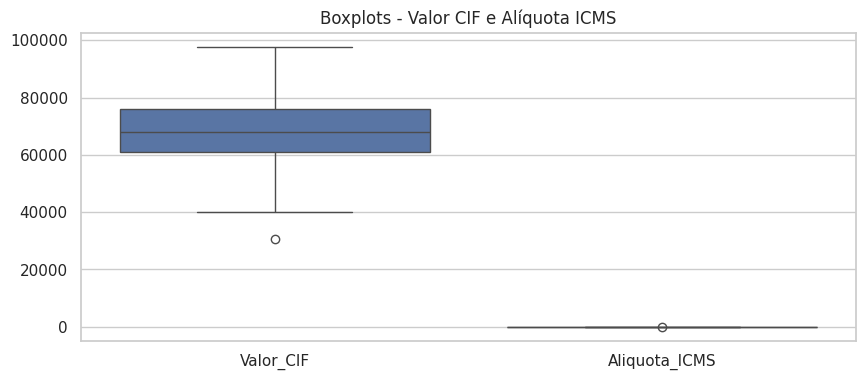

In [6]:
# Boxplots lado a lado
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Valor_CIF', 'Aliquota_ICMS']])
plt.title('Boxplots - Valor CIF e Alíquota ICMS')
plt.show()

Gera boxplots das duas variáveis para identificar distribuição, assimetria e possíveis outliers.


In [7]:
from scipy.stats import kurtosis, skew, mode
for col in ['Valor_CIF', 'Aliquota_ICMS']:
    media = df[col].mean()
    desvio = df[col].std()
    cv = desvio / media
    curt = kurtosis(df[col])
    skewn = skew(df[col])
    moda = mode(df[col], keepdims=True)[0][0]
    print(f'\n{col}')
    print(f'CV: {cv:.2f} | Curtose: {curt:.2f} | Skew: {skewn:.2f} | Média: {media:.2f} | Moda: {moda:.2f}')


Valor_CIF
CV: 0.20 | Curtose: -0.16 | Skew: -0.18 | Média: 68442.30 | Moda: 30703.82

Aliquota_ICMS
CV: 0.17 | Curtose: -0.03 | Skew: 0.38 | Média: 0.17 | Moda: 0.11


Calcula para cada variável: coeficiente de variação, curtose, assimetria (skew), média e moda. Isso ajuda a entender a forma e dispersão da distribuição.


### 🧨 Inserindo Outliers e Recalculando Métricas

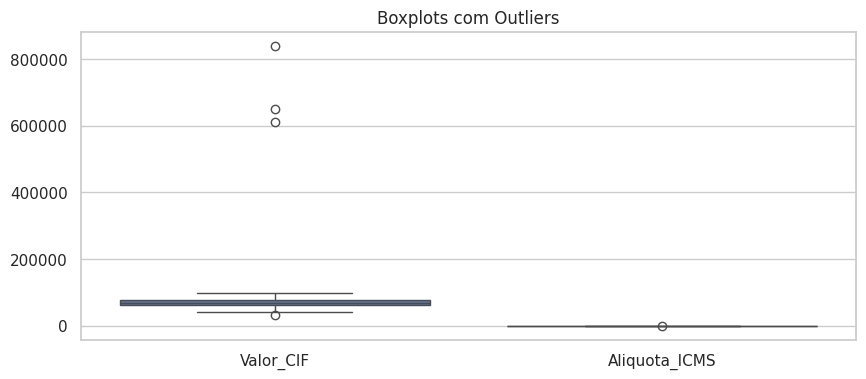

In [8]:
# Multiplicando 3 valores aleatórios de CIF por 10
outliers = np.random.choice(df.index, 3, replace=False)
df.loc[outliers, 'Valor_CIF'] *= 10

# Novo boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Valor_CIF', 'Aliquota_ICMS']])
plt.title('Boxplots com Outliers')
plt.show()

Introduz 3 outliers extremos na variável Valor_CIF para observar o impacto visual e estatístico. Replota os boxplots após a alteração.

In [9]:
# Novas métricas com outliers
for col in ['Valor_CIF', 'Aliquota_ICMS']:
    media = df[col].mean()
    desvio = df[col].std()
    cv = desvio / media
    curt = kurtosis(df[col])
    skewn = skew(df[col])
    moda = mode(df[col], keepdims=True)[0][0]
    print(f'\n{col} (com outliers)')
    print(f'CV: {cv:.2f} | Curtose: {curt:.2f} | Skew: {skewn:.2f} | Média: {media:.2f} | Moda: {moda:.2f}')


Valor_CIF (com outliers)
CV: 1.27 | Curtose: 30.89 | Skew: 5.61 | Média: 87346.32 | Moda: 30703.82

Aliquota_ICMS (com outliers)
CV: 0.17 | Curtose: -0.03 | Skew: 0.38 | Média: 0.17 | Moda: 0.11


Recalcula as métricas após a inserção dos outliers, destacando como a presença de valores extremos afeta as estatísticas descritivas.


### 📈 Parte B: Regressão Linear Simples

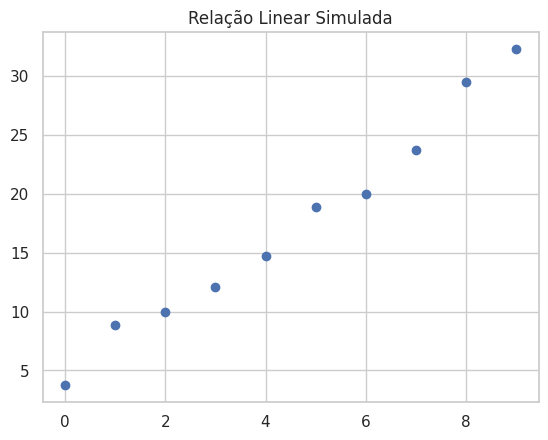

In [10]:
x = np.arange(0, 10)
y = 3*x + 4 + np.random.normal(0, 1, size=len(x))
plt.scatter(x, y)
plt.title('Relação Linear Simulada')
plt.show()

Cria um conjunto de pontos com relação linear positiva (y = 3x + 4 + ruído). Gera um gráfico de dispersão simples.


In [11]:
res = linregress(x, y)
print(f'Slope: {res.slope:.2f}, Intercept: {res.intercept:.2f}, p-value: {res.pvalue:.4f}, R²: {res.rvalue**2:.4f}')

Slope: 3.02, Intercept: 3.79, p-value: 0.0000, R²: 0.9795


Usa o linregress para calcular a inclinação, intercepto, valor p e o coeficiente de determinação (R²) da regressão linear.

In [12]:
X = x.reshape(-1, 1)
modelo = LinearRegression().fit(X, y)
print(f'Sklearn -> Coef: {modelo.coef_[0]:.2f}, Intercept: {modelo.intercept_:.2f}, R²: {modelo.score(X, y):.4f}')

Sklearn -> Coef: 3.02, Intercept: 3.79, R²: 0.9795


Realiza regressão linear com sklearn, obtendo os mesmos parâmetros da equação da reta, além do R².

In [13]:
X2 = sm.add_constant(X)
ols = sm.OLS(y, X2).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     382.1
Date:                Fri, 23 May 2025   Prob (F-statistic):           4.88e-08
Time:                        18:43:09   Log-Likelihood:                -16.463
No. Observations:                  10   AIC:                             36.93
Df Residuals:                       8   BIC:                             37.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7942      0.825      4.600      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


Aplica regressão com statsmodels para obter uma análise estatística mais detalhada (incluindo erro padrão, intervalo de confiança, F-statistic, etc).


### Variação de Interceptos e R²

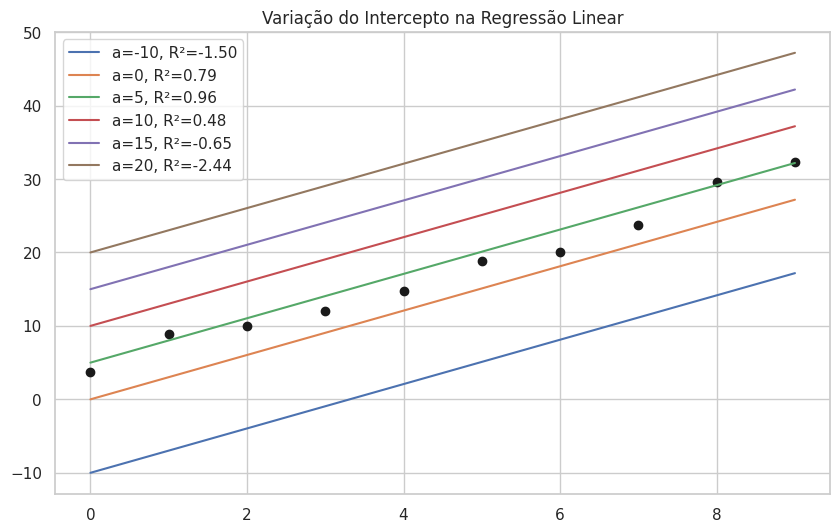

In [14]:
b = res.slope
a_vals = [-10, 0, 5, 10, 15, 20]
plt.figure(figsize=(10,6))
for a in a_vals:
    y_pred = b*x + a
    R2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2)
    plt.plot(x, y_pred, label=f'a={a}, R²={R2:.2f}')
plt.scatter(x, y, c='k')
plt.legend()
plt.title('Variação do Intercepto na Regressão Linear')
plt.show()

Compara diferentes retas com mesmo coeficiente angular (slope), mas diferentes interceptos. Calcula o R² para cada uma e plota no mesmo gráfico.


### Covariância entre x e y

In [15]:
cov = np.cov(x, y, bias=True)[0,1]
print(f'Covariância: {cov:.2f}')
print('Cov > 0 indica relação linear positiva.')

Covariância: 24.92
Cov > 0 indica relação linear positiva.


Calcula a covariância entre x e y. Um valor positivo indica que as duas variáveis crescem juntas, coerente com uma relação linear positiva.
